In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [31]:
img_rows, img_cols = 102, 136

data_path = './dataset/'
x, y = [], []
counter = 0
classes = os.listdir(data_path)

print(classes)

['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']


In [ ]:
for class_path in os.listdir(data_path):
    for img_path in os.listdir(f"{data_path}{class_path}"):
        path = f"{data_path}{class_path}/{img_path}"
        label = counter
        image = tf.keras.preprocessing.image.load_img(path, target_size=(img_rows, img_cols))
        image = tf.keras.preprocessing.image.img_to_array(image)
        x.append(image)
        y.append(label)
    counter += 1

x = np.array(x)
y = np.array(y)

x = x.astype('float32') / 255.0

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=420)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=420) 

y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_val = keras.utils.to_categorical(y_val, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

print(X_train.shape)

In [24]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(6, kernel_size=(5,5),activation='relu',input_shape=(img_rows,img_cols,3)))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))

model.add(keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 132, 6)        456       
                                                                 
 average_pooling2d_6 (Averag  (None, 49, 66, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 62, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 22, 31, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 10912)             0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=120, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
17/17 [==============================] - 6s 341ms/step - loss: 0.9969 - accuracy: 0.4874 - val_loss: 0.8255 - val_accuracy: 0.6599
Epoch 2/10
17/17 [==============================] - 5s 311ms/step - loss: 0.8357 - accuracy: 0.5939 - val_loss: 0.6932 - val_accuracy: 0.7328
Epoch 3/10
17/17 [==============================] - 5s 285ms/step - loss: 0.7178 - accuracy: 0.6510 - val_loss: 0.6236 - val_accuracy: 0.7206
Epoch 4/10
17/17 [==============================] - 5s 312ms/step - loss: 0.6251 - accuracy: 0.7192 - val_loss: 0.5589 - val_accuracy: 0.7611
Epoch 5/10
17/17 [==============================] - 5s 313ms/step - loss: 0.5654 - accuracy: 0.7525 - val_loss: 0.5497 - val_accuracy: 0.7328
Epoch 6/10
17/17 [==============================] - 6s 341ms/step - loss: 0.5040 - accuracy: 0.7929 - val_loss: 0.4755 - val_accuracy: 0.7854
Epoch 7/10
17/17 [==============================] - 5s 319ms/step - loss: 0.4463 - accuracy: 0.8182 - val_loss: 0.4198 - val_accuracy: 0.8462
Epoch 

In [26]:
score = model.evaluate(X_test, y_test)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

8/8 [==============================] - 0s 21ms/step - loss: 0.3277 - accuracy: 0.8548
Test Loss: 0.32767194509506226
Test Accuracy: 0.8548387289047241


8/8 [==============================] - 0s 19ms/step


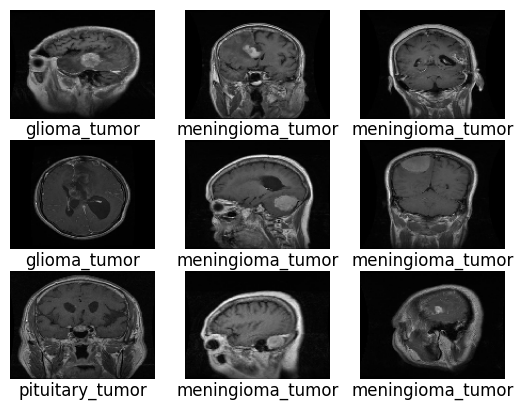

In [27]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.text(0.5, -0.15, classes[predicted_labels[i]], fontsize = 12, ha='center', transform=plt.gca().transAxes)

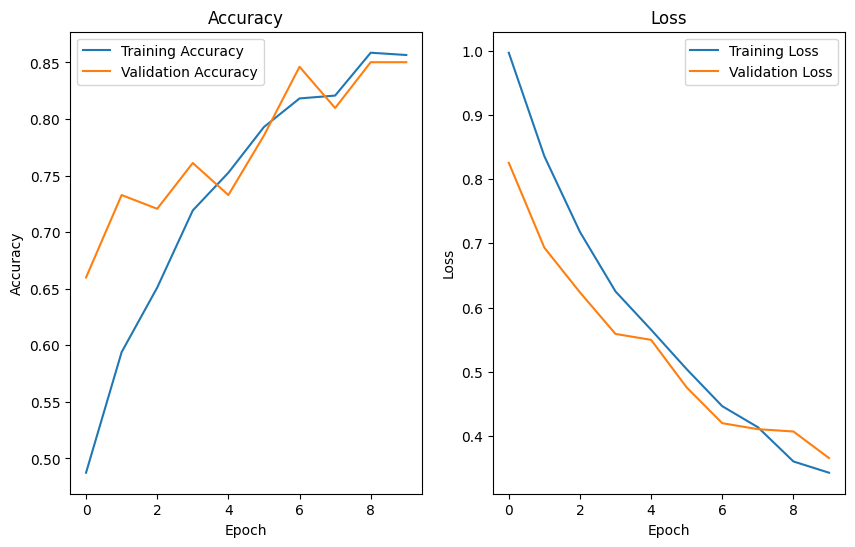

In [28]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [29]:
model.save('model_best.h5')